In [86]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import random

In [58]:
import matplotlib as mpl
COLOR = 'white'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

In [2]:
tf.__version__

'2.7.0'

In [5]:
#CNN
df_train = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")
train = tf.random.shuffle(df_train)
x_train = tf.reshape(train[:, 1:], (len(train), 28, 28, 1))
x_train = x_train/255
x_val = x_train[40000:]
x_train = x_train[:40000]
x_test = tf.reshape(df_test, (len(df_test), 28, 28, 1))
x_test = x_test/255
y_train = tf.one_hot(train[:, 0], 10)
y_val = y_train[40000:]
y_train = y_train[:40000]
model = tf.keras.Sequential(
    [
        tf.keras.layers.RandomRotation(0.2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPool2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(10, activation='softmax'),
    ]
)
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epochs, logs={}):
        if logs.get('loss') < 0.006:
            print("\n reached loss=0.006, hence stopped training!!")
            self.model.stop_training = True

callbacks = MyCallback()
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val), callbacks=[callbacks])

Epoch 1/20
1250/1250 [==============================] - 6s 4ms/step - loss: 0.2878 - accuracy: 0.9086 - val_loss: 0.1219 - val_accuracy: 0.9650
Epoch 2/20
1250/1250 [==============================] - 5s 4ms/step - loss: 0.1164 - accuracy: 0.9645 - val_loss: 0.1404 - val_accuracy: 0.9600
Epoch 3/20
1250/1250 [==============================] - 5s 4ms/step - loss: 0.0938 - accuracy: 0.9712 - val_loss: 0.1167 - val_accuracy: 0.9675
Epoch 4/20
1250/1250 [==============================] - 5s 4ms/step - loss: 0.0788 - accuracy: 0.9762 - val_loss: 0.0822 - val_accuracy: 0.9725
Epoch 5/20
1250/1250 [==============================] - 5s 4ms/step - loss: 0.0705 - accuracy: 0.9780 - val_loss: 0.0968 - val_accuracy: 0.9735
Epoch 6/20
1250/1250 [==============================] - 5s 4ms/step - loss: 0.0614 - accuracy: 0.9813 - val_loss: 0.1029 - val_accuracy: 0.9685
Epoch 7/20
1250/1250 [==============================] - 5s 4ms/step - loss: 0.0577 - accuracy: 0.9821 - val_loss: 0.0831 - val_accuracy:

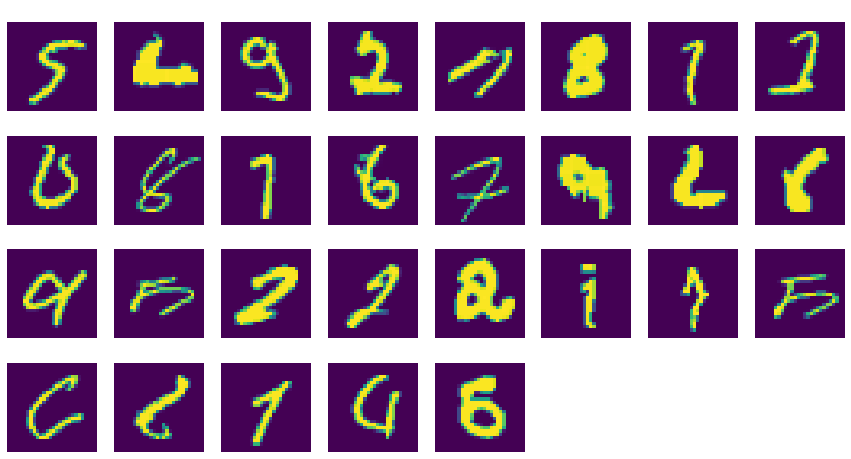

In [115]:
#Print failed cases
w = 8
h = 4
t = tf.where(tf.argmax(y_val, axis=1) - tf.argmax(model.predict(x_val), axis=1))
fig, axs = plt.subplots(h, w, figsize=(15,8))
for i in list(range(0, w*h)):
    if i < t.shape[0]:
        axs[int(i / w), i % w].set_title(f"[{train[t.numpy()[i][0] + 40000][0]}, {tf.argmax(model.predict(x_val), axis=1)[t.numpy()[i][0]]}]")
        axs[int(i / w), i % w].imshow(x_val[t.numpy()[i][0]])
        axs[int(i / w), i % w].axis('off')
    else:
        fig.delaxes(axs[int(i / w), i % w])

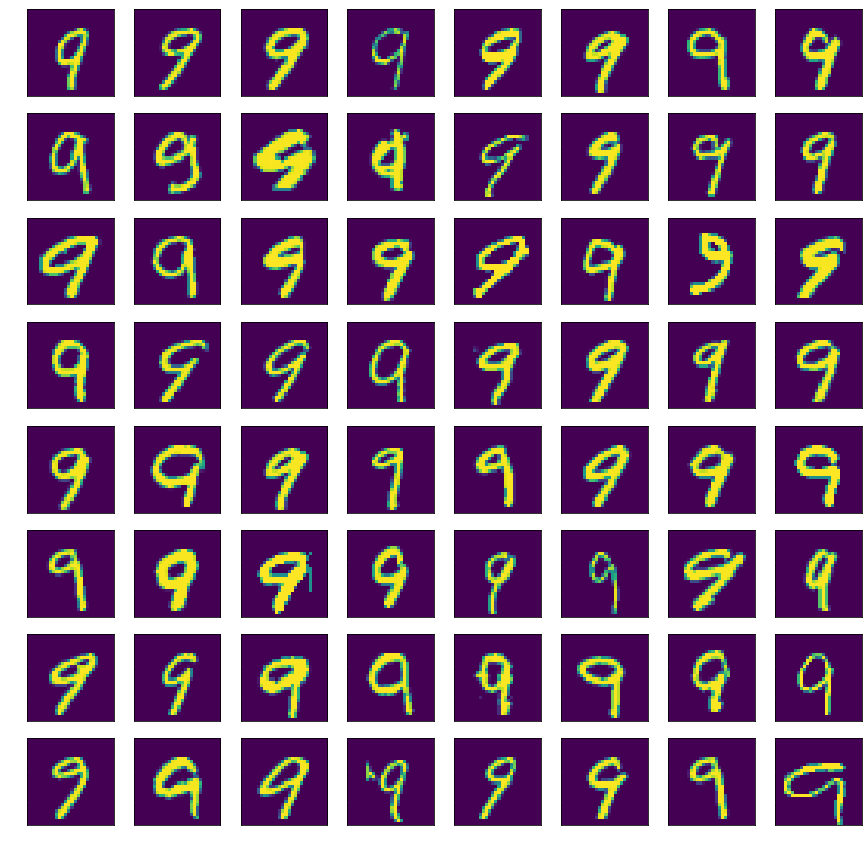

In [102]:
#Print images of specific number
w = 8
h = 8
fig, axs = plt.subplots(w, h, figsize=(15,15))
t = tf.where(train[:40000, 0] == 9)
for i in list(range(0, int(w * h))):
    axs[int(i / w), i % w].imshow(x_train[t[random.randint(0, t.shape[0])].numpy()[0]])

In [101]:
output = tf.argmax(model.predict(x_test), axis=1)
output = {"ImageId": list(range(1, 28001)), "Label": output}
output = pd.DataFrame(output)
output.to_csv("submit.csv", index=False)